<a href="https://colab.research.google.com/github/feniltailor22/Deep_Learning/blob/main/Autoencoding_Lena_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import img_to_array

In [2]:
SIZE=256

In [3]:
img= cv2.imread('/content/lena.jpg', 1)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.resize(img, (SIZE, SIZE))

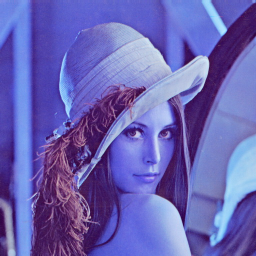

In [4]:
cv2_imshow(img)

In [5]:
img

array([[[224, 137, 127],
        [224, 136, 126],
        [224, 134, 123],
        ...,
        [230, 145, 128],
        [235, 149, 129],
        [206, 117,  98]],

       [[224, 138, 126],
        [224, 138, 126],
        [223, 135, 123],
        ...,
        [229, 147, 131],
        [231, 147, 126],
        [205, 121,  99]],

       [[227, 139, 125],
        [223, 135, 120],
        [223, 134, 119],
        ...,
        [227, 133, 122],
        [217, 124, 116],
        [180,  90,  81]],

       ...,

       [[ 92,  28,  62],
        [ 93,  30,  61],
        [ 95,  30,  62],
        ...,
        [140,  54,  74],
        [157,  63,  78],
        [160,  61,  73]],

       [[ 84,  23,  57],
        [ 89,  25,  59],
        [ 93,  28,  60],
        ...,
        [154,  63,  80],
        [171,  70,  83],
        [172,  66,  75]],

       [[ 81,  19,  56],
        [ 94,  30,  64],
        [ 93,  28,  60],
        ...,
        [166,  71,  87],
        [175,  70,  83],
        [184,  72,  82]]

In [6]:
img.shape

(256, 256, 3)

In [7]:
img_data= []

In [8]:
img_data.append(img_to_array(img))

In [9]:
img_data #list of array

[array([[[224., 137., 127.],
         [224., 136., 126.],
         [224., 134., 123.],
         ...,
         [230., 145., 128.],
         [235., 149., 129.],
         [206., 117.,  98.]],
 
        [[224., 138., 126.],
         [224., 138., 126.],
         [223., 135., 123.],
         ...,
         [229., 147., 131.],
         [231., 147., 126.],
         [205., 121.,  99.]],
 
        [[227., 139., 125.],
         [223., 135., 120.],
         [223., 134., 119.],
         ...,
         [227., 133., 122.],
         [217., 124., 116.],
         [180.,  90.,  81.]],
 
        ...,
 
        [[ 92.,  28.,  62.],
         [ 93.,  30.,  61.],
         [ 95.,  30.,  62.],
         ...,
         [140.,  54.,  74.],
         [157.,  63.,  78.],
         [160.,  61.,  73.]],
 
        [[ 84.,  23.,  57.],
         [ 89.,  25.,  59.],
         [ 93.,  28.,  60.],
         ...,
         [154.,  63.,  80.],
         [171.,  70.,  83.],
         [172.,  66.,  75.]],
 
        [[ 81.,  19.,  56.],
 

In [10]:
len(img_data)

1

In [11]:
#Reshaping into a format where we can supply many input image (if needed)

In [12]:
img_array= np.reshape(img_data, newshape=(len(img_data), SIZE, SIZE, 3))

In [13]:
img_array

array([[[[224., 137., 127.],
         [224., 136., 126.],
         [224., 134., 123.],
         ...,
         [230., 145., 128.],
         [235., 149., 129.],
         [206., 117.,  98.]],

        [[224., 138., 126.],
         [224., 138., 126.],
         [223., 135., 123.],
         ...,
         [229., 147., 131.],
         [231., 147., 126.],
         [205., 121.,  99.]],

        [[227., 139., 125.],
         [223., 135., 120.],
         [223., 134., 119.],
         ...,
         [227., 133., 122.],
         [217., 124., 116.],
         [180.,  90.,  81.]],

        ...,

        [[ 92.,  28.,  62.],
         [ 93.,  30.,  61.],
         [ 95.,  30.,  62.],
         ...,
         [140.,  54.,  74.],
         [157.,  63.,  78.],
         [160.,  61.,  73.]],

        [[ 84.,  23.,  57.],
         [ 89.,  25.,  59.],
         [ 93.,  28.,  60.],
         ...,
         [154.,  63.,  80.],
         [171.,  70.,  83.],
         [172.,  66.,  75.]],

        [[ 81.,  19.,  56.],
       

In [14]:
img_array = img_array.astype('float32') / 255. #normalization

In [15]:
img_array

array([[[[0.8784314 , 0.5372549 , 0.49803922],
         [0.8784314 , 0.53333336, 0.49411765],
         [0.8784314 , 0.5254902 , 0.48235294],
         ...,
         [0.9019608 , 0.5686275 , 0.5019608 ],
         [0.92156863, 0.58431375, 0.5058824 ],
         [0.80784315, 0.45882353, 0.38431373]],

        [[0.8784314 , 0.5411765 , 0.49411765],
         [0.8784314 , 0.5411765 , 0.49411765],
         [0.8745098 , 0.5294118 , 0.48235294],
         ...,
         [0.8980392 , 0.5764706 , 0.5137255 ],
         [0.90588236, 0.5764706 , 0.49411765],
         [0.8039216 , 0.4745098 , 0.3882353 ]],

        [[0.8901961 , 0.54509807, 0.49019608],
         [0.8745098 , 0.5294118 , 0.47058824],
         [0.8745098 , 0.5254902 , 0.46666667],
         ...,
         [0.8901961 , 0.52156866, 0.47843137],
         [0.8509804 , 0.4862745 , 0.45490196],
         [0.7058824 , 0.3529412 , 0.31764707]],

        ...,

        [[0.36078432, 0.10980392, 0.24313726],
         [0.3647059 , 0.11764706, 0.23921569]

In [16]:
img_array.shape

(1, 256, 256, 3)

In [17]:
len(img_array)

1

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense

In [19]:
#Contraction Path (Encoder)

In [20]:
model= Sequential()

In [21]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(SIZE, SIZE, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

In [22]:
#Expansive path (Decoder)

In [23]:
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=3, kernel_size=(3,3), padding='same', activation='relu'))

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [25]:
model.fit(x=img_array, y=img_array, epochs=1000, shuffle=True)

Epoch 1/1000
1/1 [==============================] - 30s 30s/step - loss: 0.2967 - accuracy: 0.0012
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2833 - accuracy: 3.0518e-05
Epoch 3/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.2656 - accuracy: 3.0518e-05
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2447 - accuracy: 3.0518e-05
Epoch 5/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.2237 - accuracy: 3.0518e-05
Epoch 6/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2088 - accuracy: 3.0518e-05
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2080 - accuracy: 3.0518e-05
Epoch 8/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2115 - accuracy: 3.0518e-05
Epoch 9/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2059 - accuracy: 4.5776e-05
Epoch 10/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1

In [26]:
pred = model.predict(img_array)

In [27]:
pred

array([[[[0.57547855, 0.24138953, 0.23557964],
         [0.7468985 , 0.36096415, 0.3331974 ],
         [0.78449124, 0.4288582 , 0.36721206],
         ...,
         [0.68947005, 0.41097054, 0.3802897 ],
         [0.7093705 , 0.3963758 , 0.35878953],
         [0.4717229 , 0.33034462, 0.32215878]],

        [[0.73518765, 0.34737414, 0.37618306],
         [0.9151792 , 0.4223628 , 0.45780513],
         [0.90889215, 0.4271092 , 0.44034594],
         ...,
         [0.84995866, 0.40143785, 0.41081956],
         [0.8968092 , 0.41907695, 0.42906794],
         [0.72849596, 0.34863782, 0.4369015 ]],

        [[0.76949364, 0.36429945, 0.3801138 ],
         [0.8919163 , 0.47542903, 0.4248743 ],
         [0.8882951 , 0.4899228 , 0.43748456],
         ...,
         [0.7986063 , 0.36039242, 0.40873814],
         [0.8530493 , 0.36771497, 0.37519512],
         [0.7091929 , 0.31229278, 0.41605675]],

        ...,

        [[0.3433689 , 0.05970123, 0.149339  ],
         [0.36202005, 0.06970205, 0.1552062 ]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


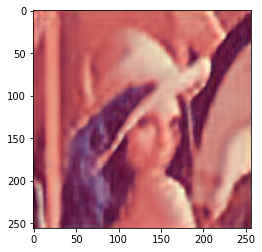

In [28]:
plt.imshow(pred[0])